# AdaBoost tutorial 

This is adapted from scikit learn docs [here](http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py). All rights and credits belong to them! This will take you through what the decision surfaces look like when we 
use the general technique of boosting to learn a powerful classifier from a set of weak classifiers. 

We will fit our data onto a group of Gaussians. We shall plot and see how it is not easy for a single weak classifier to predict properly the class disribution, but
boosting enables us to learn the entire structure.

In [2]:
# Author: Noel Dawe <noel.dawe@gmail.com>
# Modified by : Govind Gopakumar <govindg@cse.iitk.ac.in>
# License: BSD 3 clause

# Let us import the basic libraries
import numpy as np
import matplotlib.pyplot as plt

# We shall import the different classifier libraries we will need!
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [24]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)

# Concatenate the two constructed bits together
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

In [25]:
# Let's print the size of the training data set
print(X.shape)
print(y.shape)

(500, 2)
(500,)


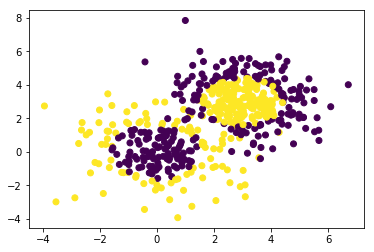

In [26]:
# This plot should show us how our data can't be cleanly seperated
plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

In AdaBoost, we choose a "base classifier" to start boosting. We shall work with a Decision Tree classifier, but note that we can choose whatever we want.

In [27]:
# Create a small Adaboosted decision tree, this time with 2 trees
bdt_small = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=2)

# Create a larger Adaboosted decision tree, this time with 200 trees!
bdt_big = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

In [28]:
# Fit both the trees
bdt_small.fit(X, y)
bdt_big.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

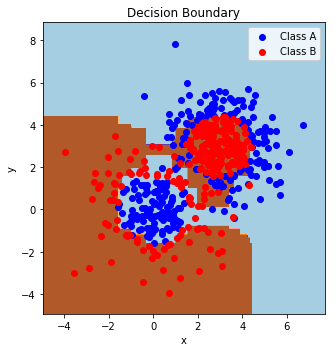

In [30]:
# Set this to bdt_small or bdt_big to see the different decision boundaries
bdt = bdt_big


# The rest of this is plotting code. You don't need to mess with this really
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# This part finds out the prediction of the classifier on a grid that spans the entire space of the training data. This is how we shall find the 
# decision "boundary" of the classifier
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()